In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from data_repository import DataRepository
from model_training_ultils import ModelMemCalculation
from model_training_ultils import ModelEvaluationUltis
import math

# Chuẩn bị dữ liệu

In [2]:
mem_cal = ModelMemCalculation()
evaludation_tool = ModelEvaluationUltis()

In [3]:
data_repo = DataRepository("../.env")
#Clean data
X_Train, y_train, X_validation, y_validation, X_test, y_test = data_repo.load_current_data(clean_data=True)

In [4]:
print(f"Train dataset: X: {X_Train.shape}, y: {y_train.shape}")
print(f"Validation dataset: X: {X_validation.shape}, y: {y_validation.shape}")
print(f"Test dataset X: {X_test.shape}, y{y_test.shape}")

Train dataset: X: (8188, 9000), y: (8188,)
Validation dataset: X: (1123, 9000), y: (1123,)
Test dataset X: (2012, 9000), y(2012,)


__Label encoder__

In [5]:
# Chuyển đổi danh sách labels thành mã số
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_validation = label_encoder.transform(y_validation)
y_test = label_encoder.transform(y_test)

In [6]:
print(list(label_encoder.classes_))
print(label_encoder.transform(list(label_encoder.classes_)))

['error', 'normal', 'overcurrent', 'overheating', 'zero']
[0 1 2 3 4]


# SVM

## Xây dựng mô hình

In [7]:
from sklearn.svm import SVC
svm_model_current = SVC(kernel='rbf', random_state=42, probability=True)
svm_model_current.fit(X_Train, y_train)

SVC(probability=True, random_state=42)

## Đánh giá mô hình

In [8]:
svm_y_pred_val = svm_model_current.predict(X_validation)

In [9]:
svm_y_pred_proba_val = svm_model_current.predict_proba(X_validation)

              precision    recall  f1-score   support

       error       0.84      0.84      0.84       231
      normal       0.99      0.97      0.98       229
 overcurrent       0.98      1.00      0.99       220
 overheating       0.83      0.96      0.89       200
        zero       1.00      0.88      0.93       243

    accuracy                           0.93      1123
   macro avg       0.93      0.93      0.93      1123
weighted avg       0.93      0.93      0.93      1123


Custom reports
Precision: 0.929580212058473
Recall: 0.9300338352681875
Accuracy: 0.9278717720391808
F1-Score (Macro): 0.9280360476112222
Macro-average AUC (SVM): 0.9966429345680428


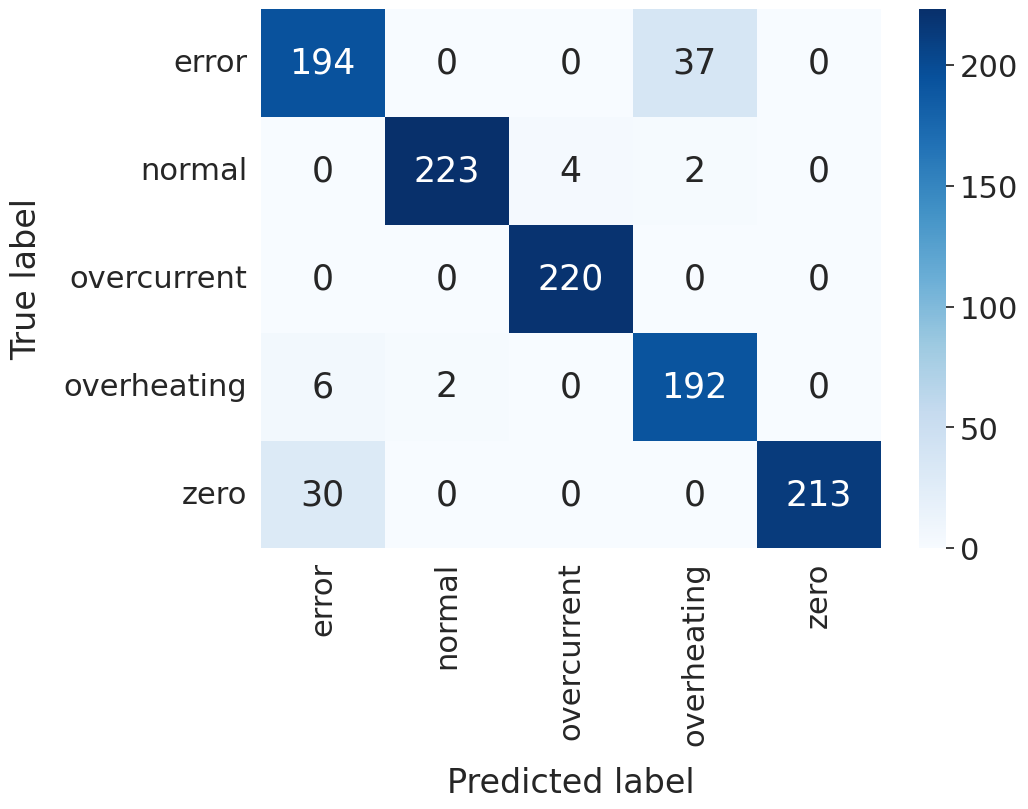

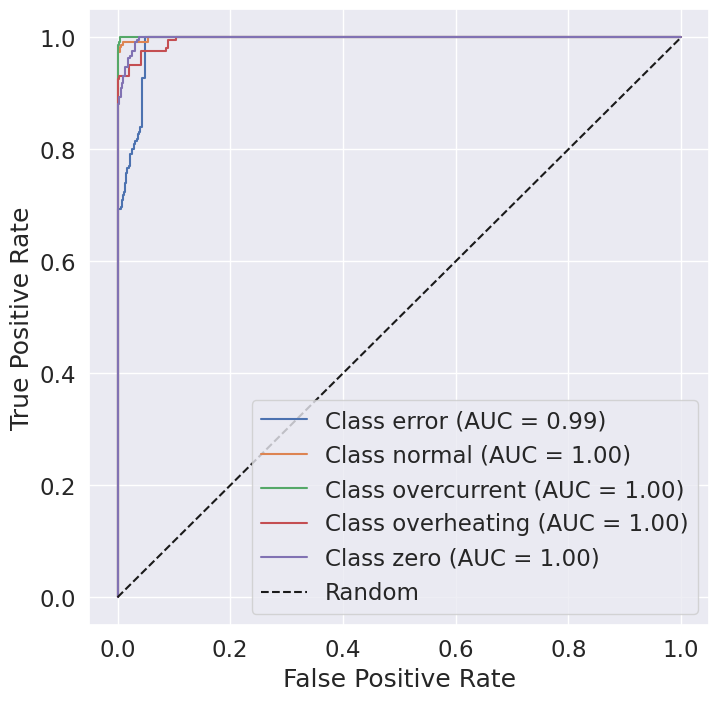

In [10]:
svm_val_conf_matrix = evaludation_tool.evaluate_and_print_results(y_pred=svm_y_pred_val, y_pred_proba=svm_y_pred_proba_val, y_test=y_validation, label_encoder=label_encoder)
evaludation_tool.plot_conf_matrix(conf_matrix=svm_val_conf_matrix)
evaludation_tool.plot_auc_curve(y_pred_proba=svm_y_pred_proba_val, y_test=y_validation, label_encoder=label_encoder)

In [11]:
svm_y_pred = svm_model_current.predict(X_test)
svm_y_pred_proba = svm_model_current.predict_proba(X_test)

              precision    recall  f1-score   support

       error       0.90      0.85      0.87       414
      normal       0.97      0.99      0.98       394
 overcurrent       1.00      1.00      1.00       421
 overheating       0.84      0.94      0.89       374
        zero       1.00      0.92      0.96       409

    accuracy                           0.94      2012
   macro avg       0.94      0.94      0.94      2012
weighted avg       0.94      0.94      0.94      2012


Custom reports
Precision: 0.9416283677342108
Recall: 0.9411154616157382
Accuracy: 0.9408548707753479
F1-Score (Macro): 0.9403788324078471
Macro-average AUC (SVM): 0.9974691817679453


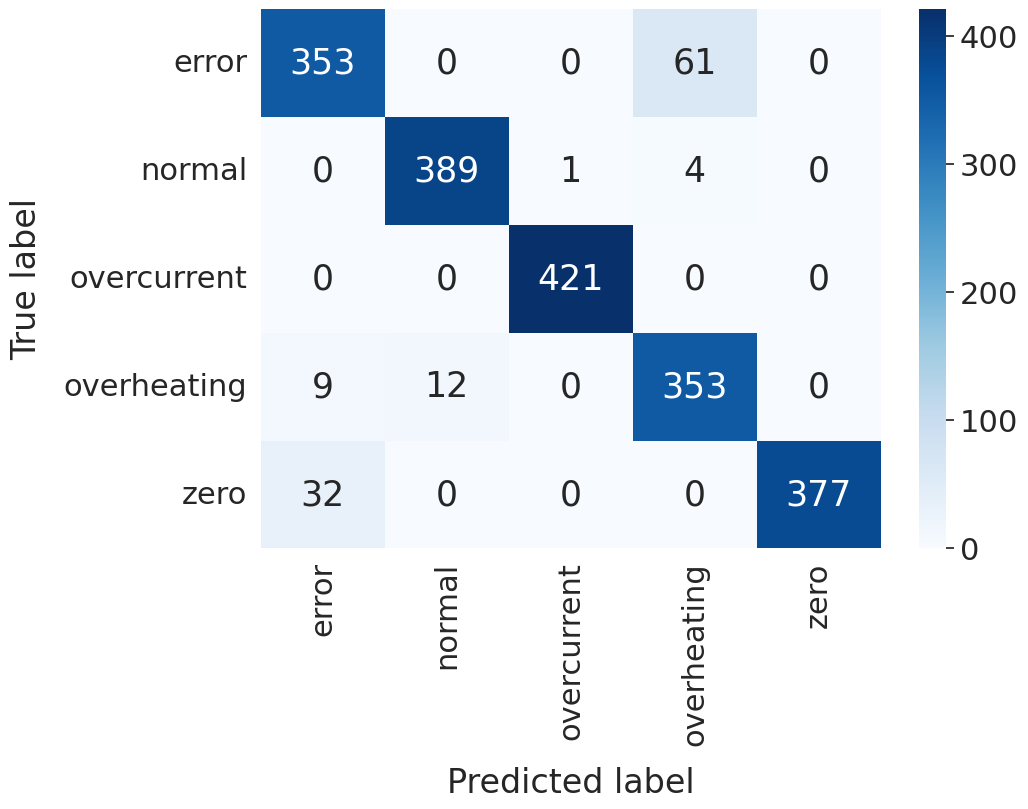

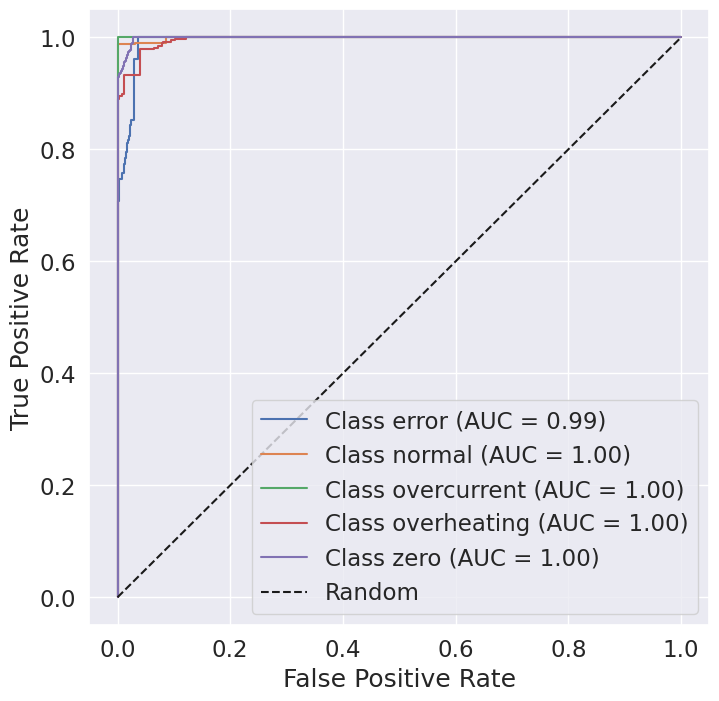

In [12]:
svm_conf_matrix = evaludation_tool.evaluate_and_print_results(y_pred=svm_y_pred, y_pred_proba=svm_y_pred_proba, y_test=y_test, label_encoder=label_encoder)
evaludation_tool.plot_conf_matrix(conf_matrix=svm_conf_matrix)
evaludation_tool.plot_auc_curve(y_pred_proba=svm_y_pred_proba, y_test=y_test, label_encoder=label_encoder)

# Random Forest

## Xây dựng mô hình

In [7]:
import time
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
rf_current = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_current.fit(X_Train, y_train)
end_time = time.time()
print(end_time-start_time)

4.186714172363281


## Đánh giá mô hình

In [14]:
rf_y_pred_val = rf_current.predict(X_validation)
rf_y_pred_proba_val = rf_current.predict_proba(X_validation)

              precision    recall  f1-score   support

       error       0.88      1.00      0.93       231
      normal       1.00      0.97      0.99       229
 overcurrent       0.98      1.00      0.99       220
 overheating       1.00      1.00      1.00       200
        zero       1.00      0.88      0.93       243

    accuracy                           0.97      1123
   macro avg       0.97      0.97      0.97      1123
weighted avg       0.97      0.97      0.97      1123


Custom reports
Precision: 0.9710665110732885
Recall: 0.9692026664370188
Accuracy: 0.9670525378450578
F1-Score (Macro): 0.9685891674003428
Macro-average AUC (SVM): 0.999085565148399


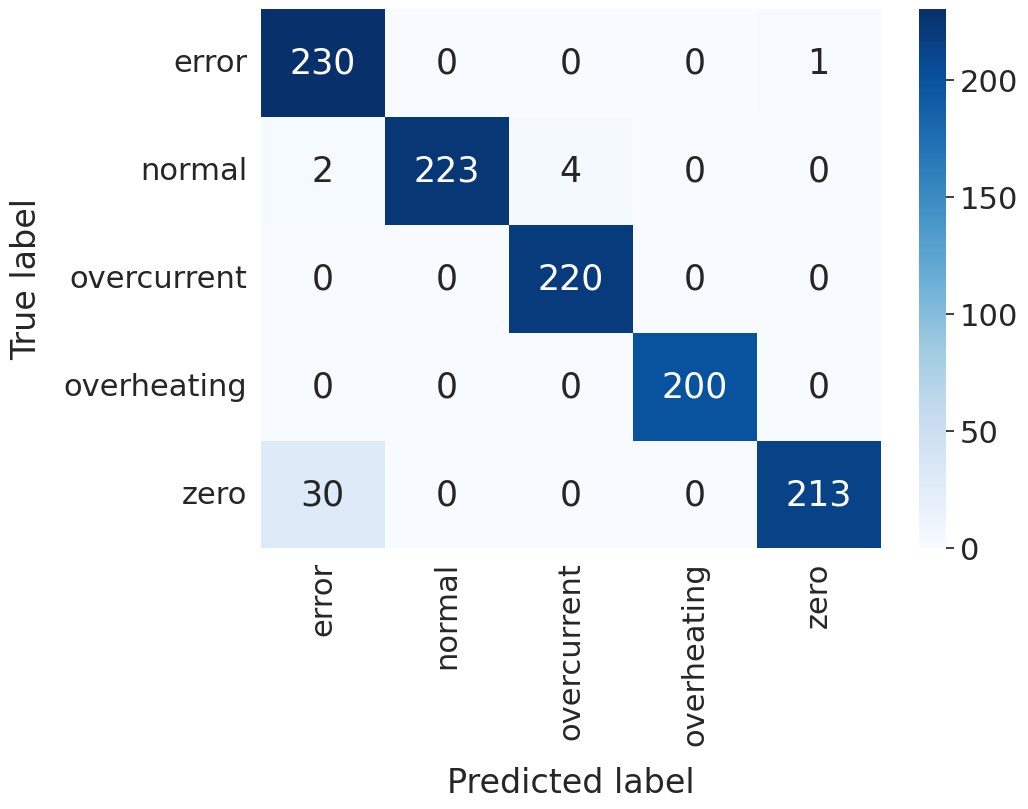

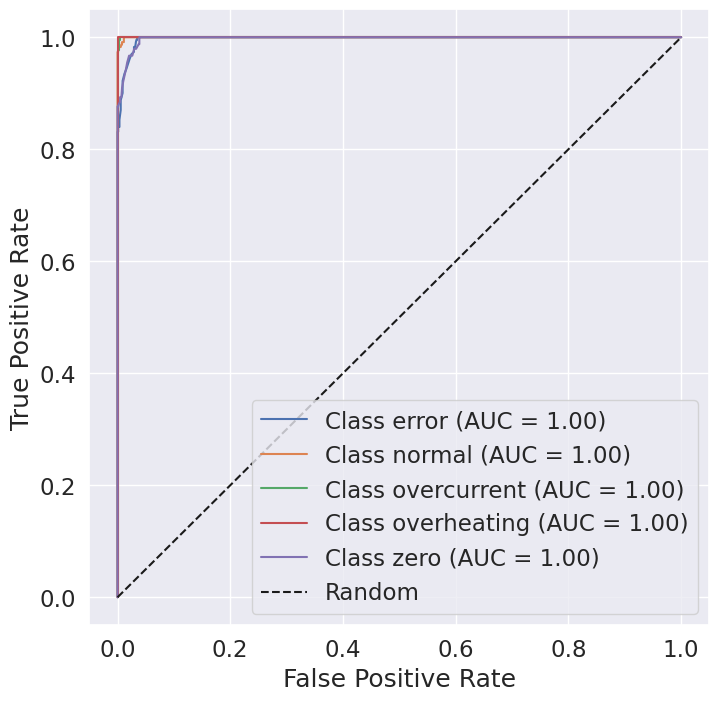

In [15]:
rf_val_cm = evaludation_tool.evaluate_and_print_results(y_pred=rf_y_pred_val, y_pred_proba=rf_y_pred_proba_val, y_test=y_validation, label_encoder=label_encoder)
evaludation_tool.plot_conf_matrix(conf_matrix=rf_val_cm)
evaludation_tool.plot_auc_curve(y_pred_proba=rf_y_pred_proba_val, y_test=y_validation, label_encoder=label_encoder)

In [16]:
rf_y_pred = rf_current.predict(X_test)
rf_y_pred_proba = rf_current.predict_proba(X_test)

              precision    recall  f1-score   support

       error       0.92      1.00      0.96       414
      normal       1.00      0.99      0.99       394
 overcurrent       1.00      1.00      1.00       421
 overheating       1.00      1.00      1.00       374
        zero       0.99      0.93      0.96       409

    accuracy                           0.98      2012
   macro avg       0.98      0.98      0.98      2012
weighted avg       0.98      0.98      0.98      2012


Custom reports
Precision: 0.982816242327036
Recall: 0.9812910593504756
Accuracy: 0.9811133200795229
F1-Score (Macro): 0.9815219520526804
Macro-average AUC (SVM): 0.9995686242498036


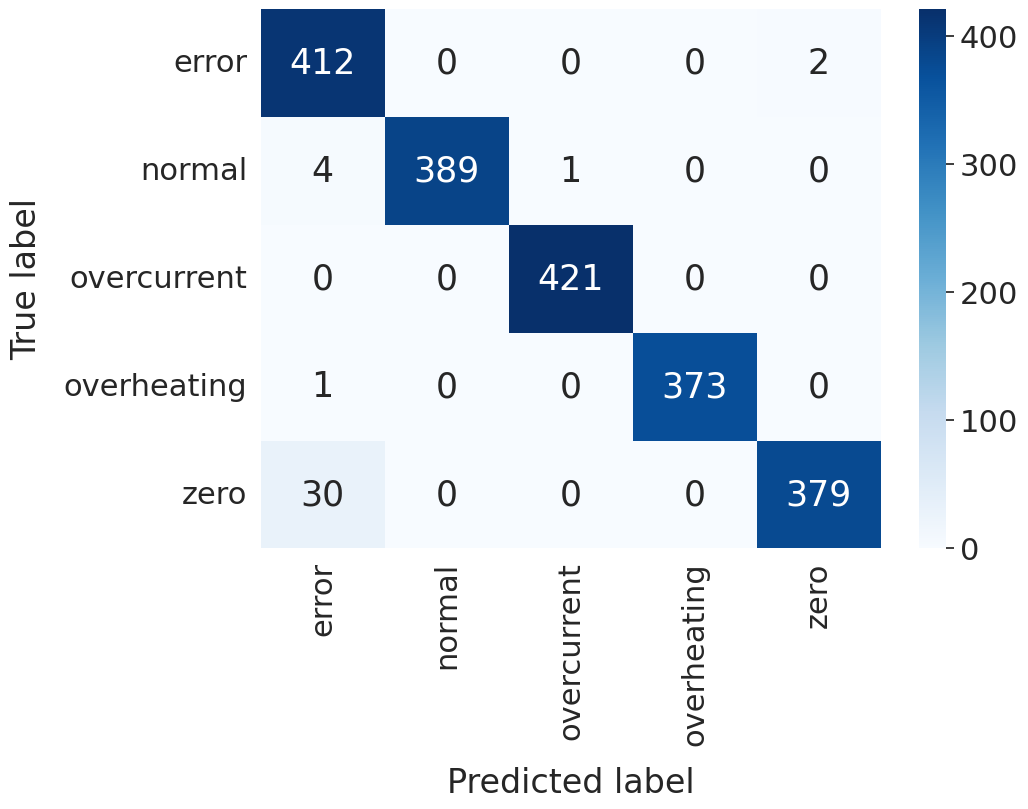

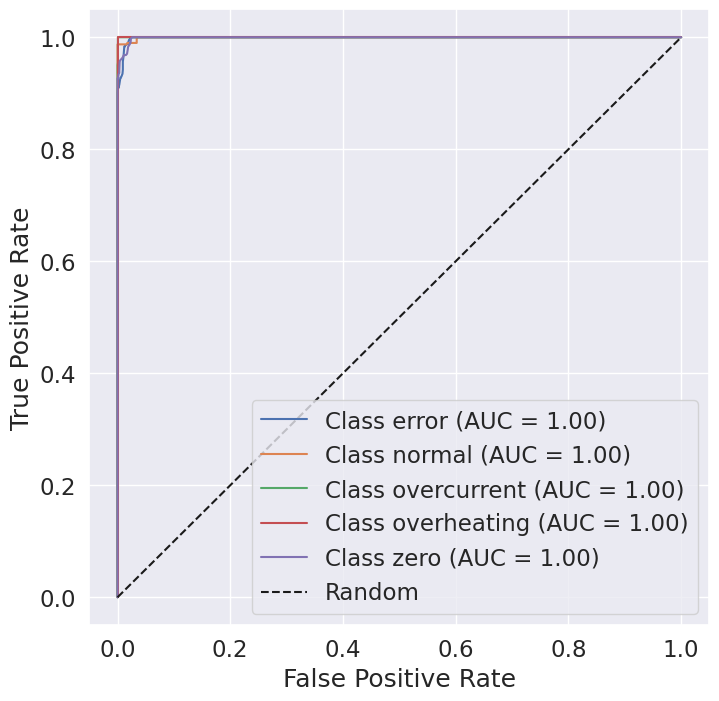

In [17]:
rf_cm = evaludation_tool.evaluate_and_print_results(y_pred=rf_y_pred, y_pred_proba=rf_y_pred_proba, y_test=y_test, label_encoder=label_encoder)
evaludation_tool.plot_conf_matrix(conf_matrix=rf_cm)
evaludation_tool.plot_auc_curve(y_pred_proba=rf_y_pred_proba, y_test=y_test, label_encoder=label_encoder)

# XgBoost

## Xây dựng mô hình

In [18]:
from xgboost import XGBClassifier
xgboost_current = XGBClassifier(objective='binary:logistic', tree_method="gpu_hist")
xgboost_current.fit(X_Train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

## Đánh giá mô hình

In [19]:
xgb_y_pred_val = xgboost_current.predict(X_validation)
xgb_y_pred_proba_val = xgboost_current.predict_proba(X_validation)

              precision    recall  f1-score   support

       error       0.88      0.96      0.92       231
      normal       0.97      0.97      0.97       229
 overcurrent       0.98      0.97      0.98       220
 overheating       0.99      0.98      0.99       200
        zero       0.96      0.89      0.92       243

    accuracy                           0.95      1123
   macro avg       0.96      0.96      0.96      1123
weighted avg       0.96      0.95      0.95      1123


Custom reports
Precision: 0.957222645010293
Recall: 0.9562480942602243
Accuracy: 0.9545859305431879
F1-Score (Macro): 0.956223886533266
Macro-average AUC (SVM): 0.9982215005357169


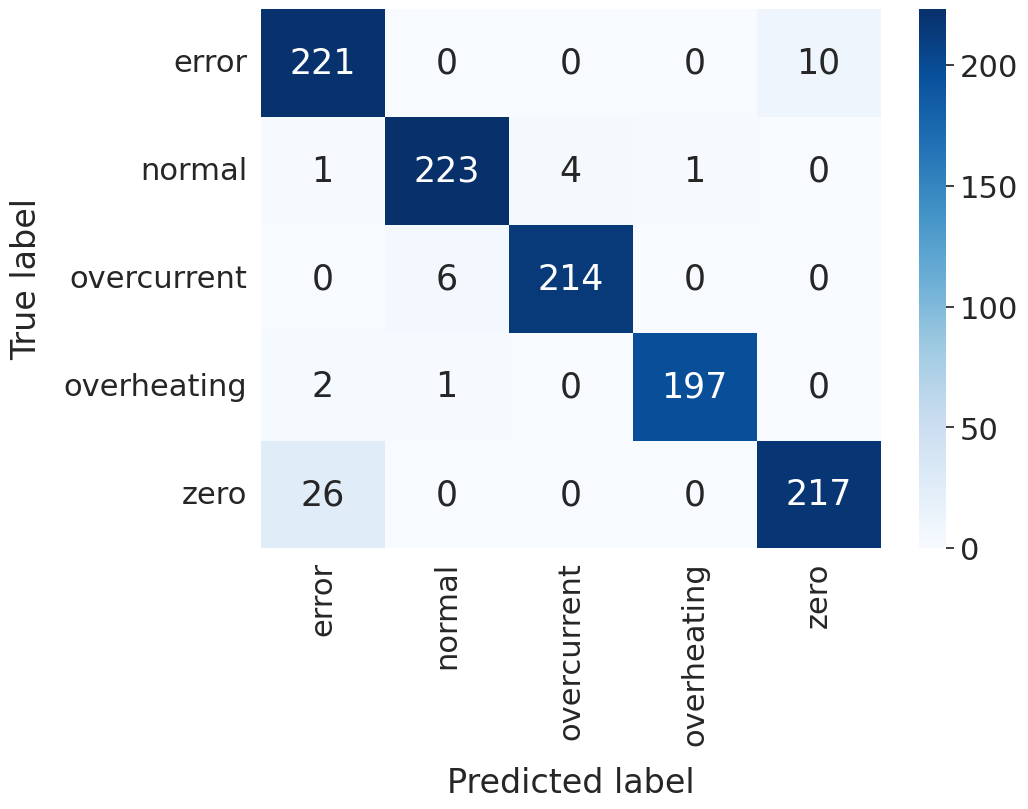

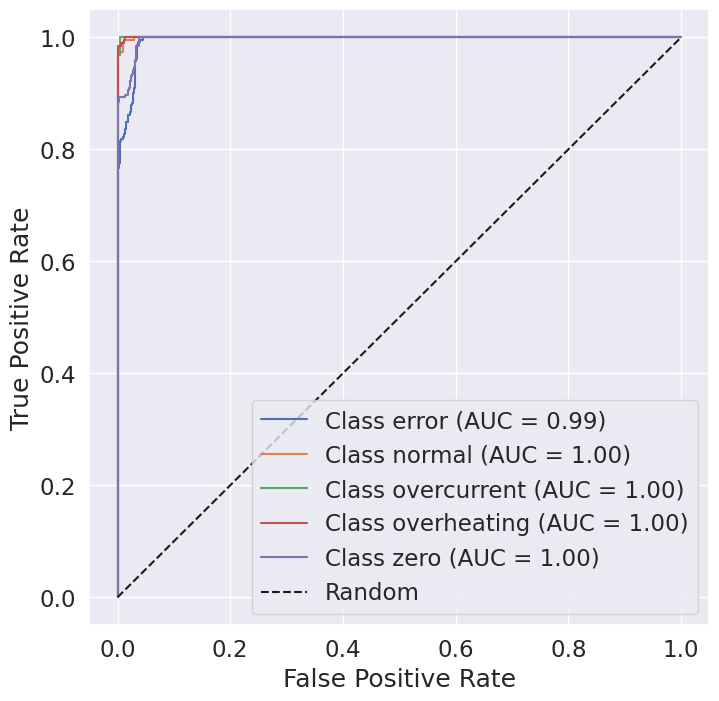

In [20]:
xgb_val_cm = evaludation_tool.evaluate_and_print_results(y_pred=xgb_y_pred_val, y_pred_proba=xgb_y_pred_proba_val, y_test=y_validation, label_encoder=label_encoder)
evaludation_tool.plot_conf_matrix(conf_matrix=xgb_val_cm)
evaludation_tool.plot_auc_curve(y_pred_proba=xgb_y_pred_proba_val, y_test=y_validation, label_encoder=label_encoder)

In [21]:
xgb_y_pred = xgboost_current.predict(X_test)
xgb_y_pred_proba = xgboost_current.predict_proba(X_test)

              precision    recall  f1-score   support

       error       0.92      1.00      0.95       414
      normal       0.95      0.99      0.97       394
 overcurrent       1.00      0.97      0.98       421
 overheating       0.99      0.96      0.98       374
        zero       0.99      0.93      0.96       409

    accuracy                           0.97      2012
   macro avg       0.97      0.97      0.97      2012
weighted avg       0.97      0.97      0.97      2012


Custom reports
Precision: 0.9702732679306664
Recall: 0.9680905087728575
Accuracy: 0.9681908548707754
F1-Score (Macro): 0.9684100073595407
Macro-average AUC (SVM): 0.9992428175390057


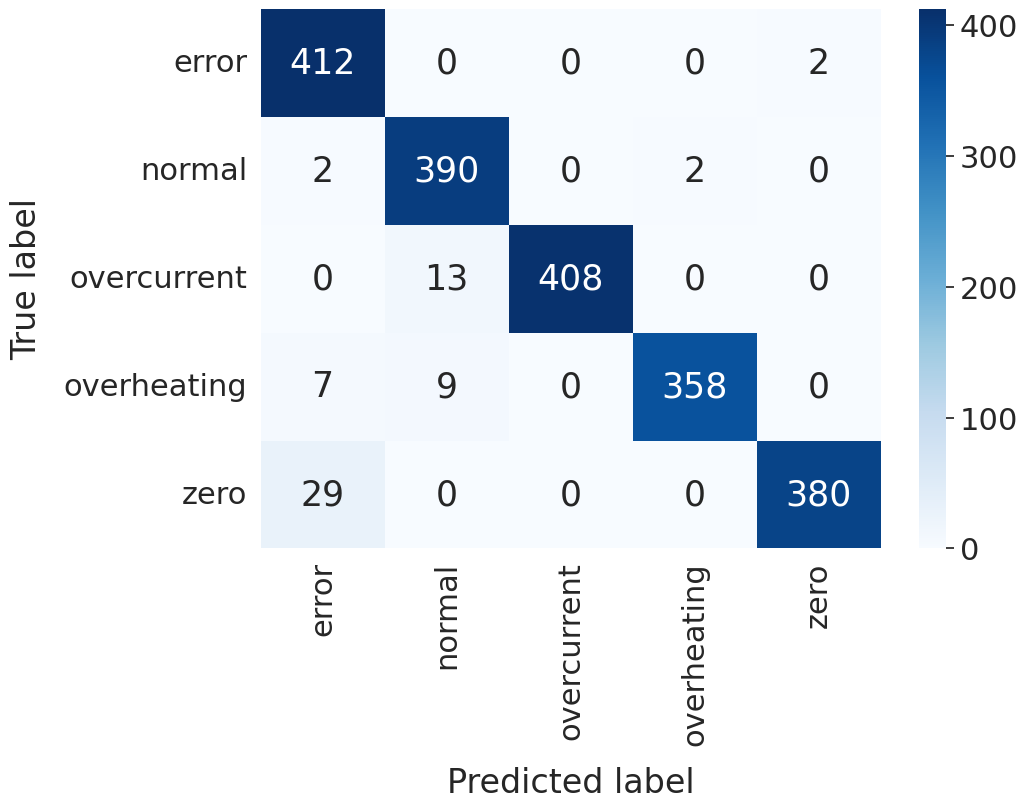

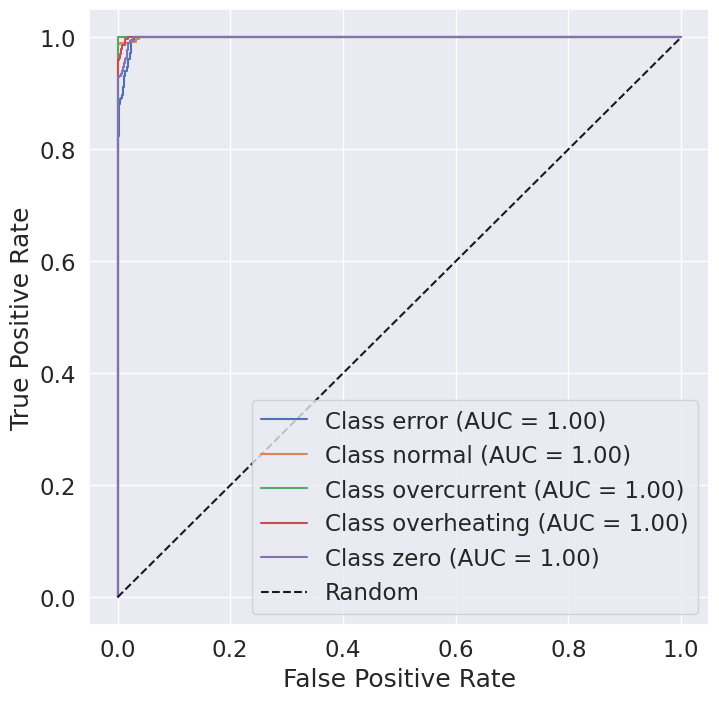

In [22]:
xgb_test_cm = evaludation_tool.evaluate_and_print_results(y_pred=xgb_y_pred, y_pred_proba=xgb_y_pred_proba, y_test=y_test, label_encoder=label_encoder)
evaludation_tool.plot_conf_matrix(conf_matrix=xgb_test_cm)
evaludation_tool.plot_auc_curve(y_pred_proba=xgb_y_pred_proba, y_test=y_test, label_encoder=label_encoder)

# Overfitting check

In [23]:
svm_train_accuracy = accuracy_score(y_pred=svm_model_current.predict(X_Train), y_true=y_train)
svm_validation_accuracy = accuracy_score(y_pred=svm_y_pred_val, y_true=y_validation) 
svm_test_accuracy = accuracy_score(y_pred=svm_y_pred, y_true=y_test)
print(f"SVM train error: {1-svm_train_accuracy}, validation error: {1-svm_validation_accuracy}, test error: {1-svm_test_accuracy}")

SVM train error: 0.0582559843673669, validation error: 0.07212822796081919, test error: 0.05914512922465209


In [24]:
rf_train_accuracy = accuracy_score(y_pred=rf_current.predict(X_Train), y_true=y_train)
rf_val_ac = accuracy_score(y_pred=rf_y_pred_val, y_true=y_validation)
rf_test_ac = accuracy_score(y_pred=rf_y_pred, y_true=y_test)
print(f"RF train error: {1-rf_train_accuracy}, validation error: {1-rf_val_ac}, test error: {1-rf_test_ac}")

RF train error: 0.0001221299462628167, validation error: 0.03294746215494215, test error: 0.0188866799204771


In [25]:
xgb_train_accuracy = accuracy_score(y_pred=xgboost_current.predict(X_Train), y_true=y_train)
xgb_val_ac = accuracy_score(y_pred=xgb_y_pred_val, y_true=y_validation)
xgb_test_ac = accuracy_score(y_pred=xgb_y_pred, y_true=y_test)
print(f"XgBoost train error: {1-xgb_train_accuracy}, SVM validation error: {1-xgb_val_ac}, SVM test error: {1-xgb_test_ac}")

XgBoost train error: 0.0001221299462628167, SVM validation error: 0.045414069456812145, SVM test error: 0.031809145129224614
